In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
genuine_mean = 30
genuine_std = 10
imposter_mean = 60
imposter_std = 15

In [ ]:
genuine_scores = np.random.normal(genuine_mean, genuine_std, 100000)
imposter_scores = np.random.normal(imposter_mean, imposter_std, 100000)

In [ ]:
def gaussian(x, mu, sigma):
  return(1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x-mu) / sigma) ** 2)

In [ ]:
thresholds = np.linspace(0,100, 1000)

In [ ]:
x = np.linspace(0, 100, 1000)
genuine_distribution = gaussian(x, genuine_mean, genuine_std)
imposter_distribution = gaussian(x, imposter_mean, imposter_std)

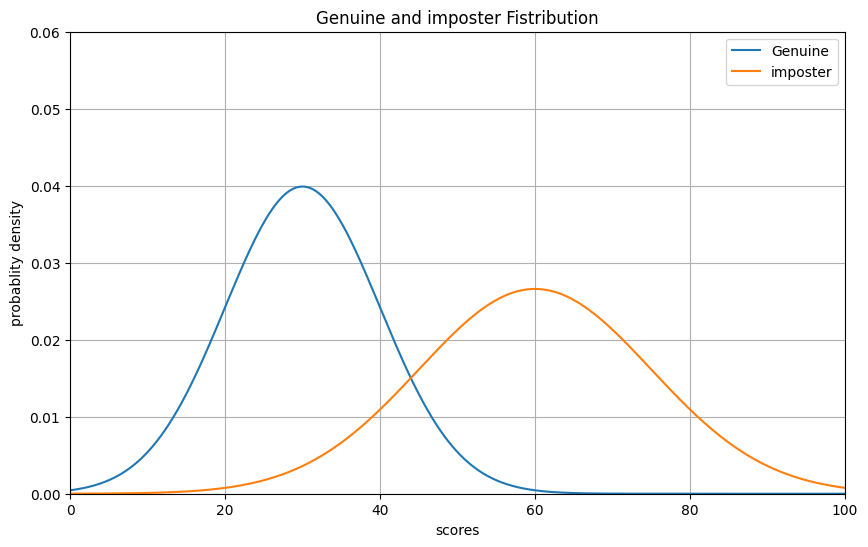

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x, genuine_distribution, label='Genuine')
plt.plot(x, imposter_distribution, label='imposter')
plt.xlabel('scores')
plt.ylabel('probablity density')
plt.title('Genuine and imposter Fistribution')
plt.legend()
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 0.06)
plt.show()

In [ ]:
def classify_score(score, threshold):
  return score <= threshold

In [ ]:
def calculate_metrics(threshold):
  genuine_accept = np.sum(classify_score(genuine_scores, threshold))
  imposter_accept = np.sum(classify_score(imposter_scores, threshold))
  TP = genuine_accept
  FN = len(genuine_scores) - genuine_accept
  FP = imposter_accept
  TN = len(imposter_scores) - imposter_accept
  return TP, TN, FP, FN

In [ ]:
def calculate_far_frr(TP, TN ,FP, FN):
  FAR = FP / (FP + TN)
  FRR = FN / (FN + TP)
  return FAR, FRR

In [ ]:
def calculate_far_frr_for_threshold(threshold):
  TP, TN, FP, FN = calculate_metrics(threshold)
  FAR, FRR = calculate_far_frr(TP, TN, FP, FN)
  return FAR, FRR

In [ ]:
FAR_50, FRR_50 = calculate_far_frr_for_threshold(50)
FAR_75, FRR_75 = calculate_far_frr_for_threshold(75)

In [ ]:
thresholds = np.linspace(0, 100, 1000)
FARs = []
FRRs = []
for threshold in thresholds:
  FAR, FRR = calculate_far_frr_for_threshold(threshold)
  FARs.append(FAR)
  FRRs.append(FRR)


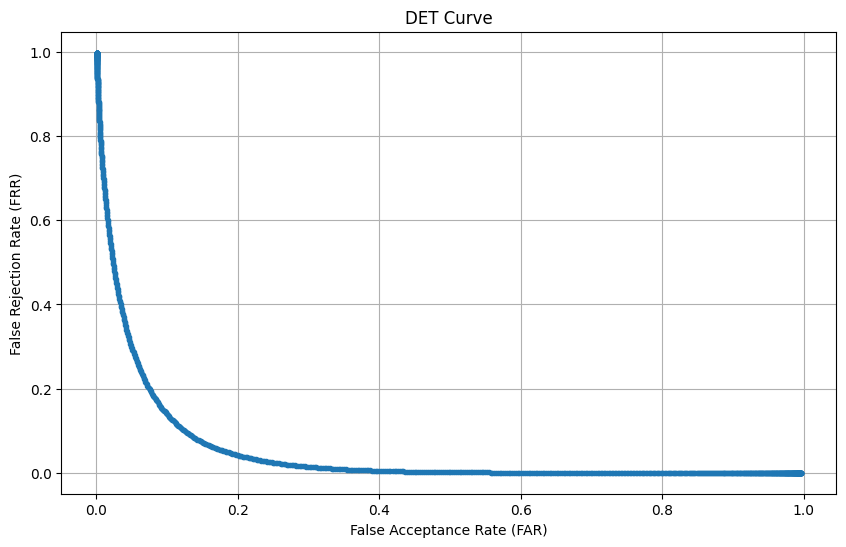

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(FARs, FRRs, linestyle='-', marker='.')
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)
plt.show()

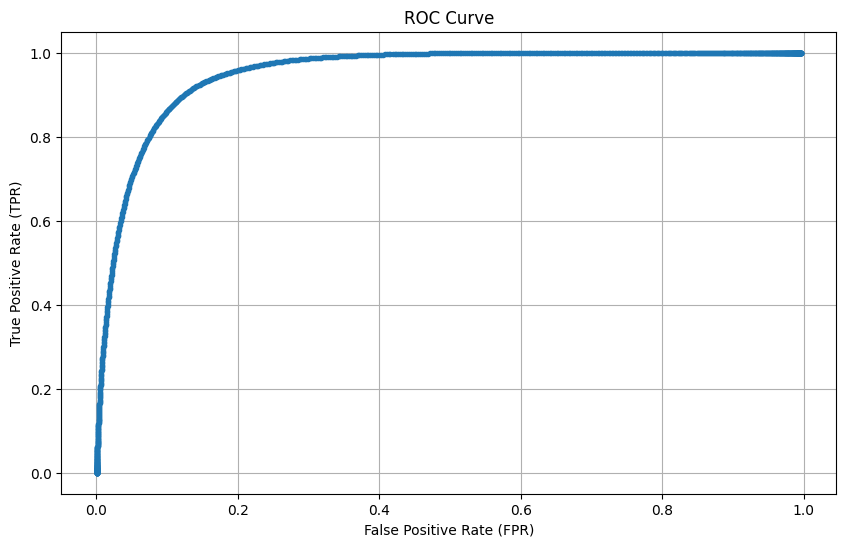

In [ ]:
TPRs = []
FPRs = []
for threshold in thresholds:
    TP, TN, FP, FN = calculate_metrics(threshold)
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TPRs.append(TPR)
    FPRs.append(FPR)

plt.figure(figsize=(10, 6))
plt.plot(FPRs, TPRs, linestyle='-', marker='.')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid(True)
plt.show()